<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/pew_infoengagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## http://www.pewinternet.org/dataset/sept-29-nov-6-2016-information-engaged-and-information-wary/ 

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

data_url = "/content/drive/My Drive/datasets/Pew_info_engage_wary/Pew_info_engaged_wary.csv"

# !ls "/content/drive/My Drive/datasets/Pew_info_engage_wary"

df = pd.read_csv(data_url)

In [40]:
df.describe()

df.head()


,psraid,sample,int_date,lang,comp,version,form,live1,q1a,q1b,...,inc,party,ideo,hh1,fips,cregion,state,density,weight,standwt
count,3015.000000,3015.000000,3015.000000,3015.000000,3015.0,3015.0,3015.000000,3015.000000,3015.000000,3015.000000,...,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000
mean,178917.716418,1.748922,102113.014925,1.059370,1.0,1.0,1.499171,2.559867,2.109784,1.845771,...,15.282919,2.391376,3.243118,3.480597,28603.954892,2.682255,28.515755,2.940630,2.843196,0.999999
std,44753.914987,0.433705,4248.771755,0.236355,0.0,0.0,0.500082,1.126820,1.063770,1.054155,...,28.778239,1.430098,1.668912,8.325906,16025.487456,1.008853,16.002582,1.412379,1.380240,0.485453
min,100003.000000,1.000000,92916.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1003.000000,1.000000,1.000000,1.000000,1.000000,0.351717
25%,103658.000000,1.000000,100516.000000,1.000000,1.0,1.0,1.000000,2.000000,1.000000,1.000000,...,4.000000,1.000000,2.000000,2.000000,13089.000000,2.000000,13.000000,2.000000,1.735294,0.610332
50%,203145.000000,2.000000,100916.000000,1.000000,1.0,1.0,1.000000,3.000000,2.000000,2.000000,...,6.000000,2.000000,3.000000,2.000000,29099.000000,3.000000,29.000000,3.000000,2.588235,0.910326
75%,206255.000000,2.000000,102916.000000,1.000000,1.0,1.0,2.000000,3.000000,3.000000,2.000000,...,8.000000,3.000000,4.000000,4.000000,42043.000000,3.000000,42.000000,4.000000,3.794118,1.334455
max,210170.000000,2.000000,110616.000000,2.000000,1.0,1.0,2.000000,9.000000,9.000000,9.000000,...,99.000000,9.000000,9.000000,99.000000,56035.000000,4.000000,56.000000,5.000000,5.794118,2.037888


In [149]:
f = 'age' # main axis feature

gf1 = 'eminuse' # group feature 1
gf2 = 'libusea' # group feature 2

## for 'libusea', 1 or 2 means "has been to library", 3 means "not even once"

## we want a new 2-valued randvar constructed by saying "if (df[gf2]==1 or df[gf2]==2) then newRandVar==1 elif df[gf2]==3) then newRandVar==2"

assert len(df[gf2])==len(df[gf1])
N = len(df[gf1])

libraryUse  = [0] * len(df[gf2])
internetHas = [0] * len(df[gf1])

        # we'll do the same for gf1, so that don'tknow/refuse is concentrated to the same id as gf2
for j in range(N):
  if (df[gf1][j]==1): internetHas[j] = 1 
  elif (df[gf1][j]==2): internetHas[j] = 2
  else: internetHas[j] = 3

for i in range(N):
  if (df[gf2][i]==1 or df[gf2][i]==2): libraryUse[i] = 1
  elif (df[gf2][i]==3): libraryUse[i] = 2
  else: libraryUse[i] = 3

assert len(df[gf1])==len(internetHas)
assert len(df[gf2])==len(libraryUse)

#### I'M sure there's a more idiomatic pandas way to do this


df2 = df.copy()

df2[gf1] = internetHas
df2[gf2] = libraryUse


# print(list(df[gf2]))
# print(list(libraryUse))
# print(list(df2[gf2]))

print(list(df[gf1]))
print(list(internetHas))
print(list(df2[gf1]))

# df2[gf2].isna().sum()

print(df[gf1].dtypes)
print(df2[gf1].dtypes)




[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [154]:
#" 1 means yes, 2 means no.  "

grouped_data1 = df2[f].groupby(df2[gf1])
# bp_call1 = [group for name, group in grouped_data1] 

grouped_data2 = df2[f].groupby(df2[gf2]) 
# bp_call2 = [group for name, group in grouped_data2]

## for each, 3 means "don't know / refused "

print(list([name for name, group in grouped_data1]))

[1, 2, 3]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


AttributeError: ignored

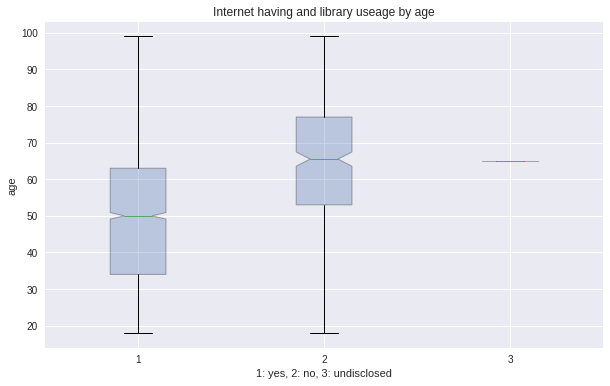

In [153]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_axisbelow(True)
ax.set_title('Internet having and library useage by age')
ax.set_xlabel('1: yes, 2: no, 3: undisclosed')
ax.set_ylabel('age')

def draw_plot(gdata, edge_color, fill_color):
  ## https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
    data = [group for name, group in gdata]
    xtl = [name for name, group in gdata]
    bp = ax.boxplot(data, notch=True, patch_artist=True, boxprops=dict(alpha=.3))

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, xticklabels=xtl)

    for patch in bp['boxes']: 
      patch.set(facecolor=fill_color)


#draw_plot(bp_call1, 'blue', 'cyan')
draw_plot(grouped_data2, 'red', 'tan')

draw_plot(grouped_data1, 'blue', 'cyan')

# print(list(bp_call1))


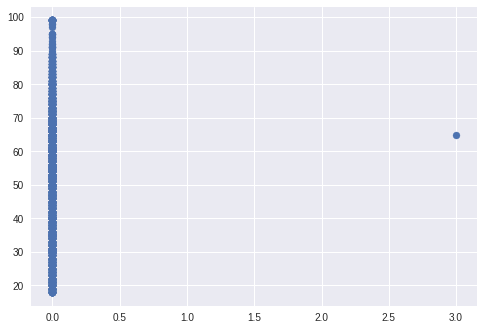

In [134]:
plt.scatter(df2[gf1], df[f])

# draw_plot(bp_call2, 'red', 'tan')

(array([369., 345., 376., 368., 445., 465., 342., 181.,  76.,  48.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <a list of 10 Patch objects>)

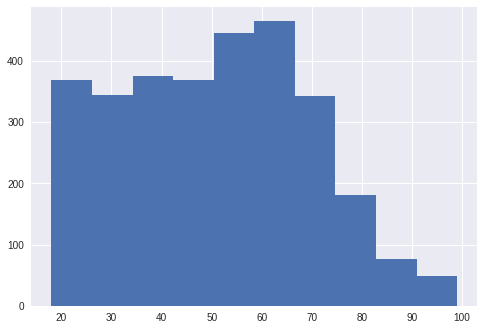

In [74]:
plt.hist(df['age'])


(array([1435., 1167.,  408.,    0.,    0.,    0.,    0.,    0.,    3.,
           2.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

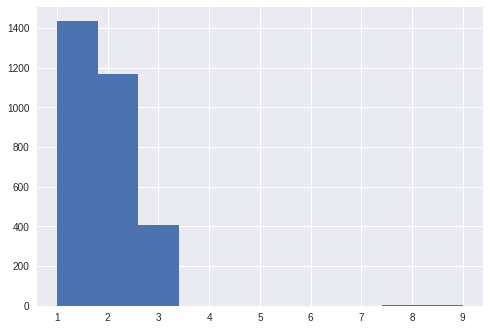

In [75]:
plt.hist(df['libusea'])

TypeError: ignored

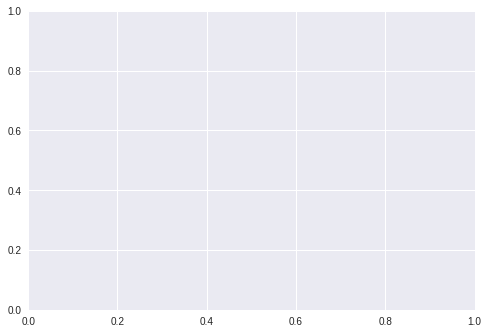

In [93]:
plt.hist(libraryUse)